# 1. Logging in Python

## 1.1 Logging

Logging is a means of **tracking events that happen when some software runs**. Logging is important for software developing, debugging, and running.

If you don’t have any logging record and your program crashes, there are very few chances that you detect the cause of the problem. And if you detect the cause, it will consume a lot of time. With logging, you can leave a trail of breadcrumbs so that if something goes wrong, we can determine the cause of the problem. 

There are a number of situations like if you are expecting an integer, you have been given a float and you can a cloud API, the service is down for maintenance, and much more. Such problems are out of control and are hard to determine.

## 1.2 Why Printing is Not a Good Option?

When you run a python script, you want to know what part of the script is getting executed and inspect what values the variables hold. Usually, you may just print out meaningful messages so you can see them in the console. And this probably all you need when you are developing small programs.

The problem is, when you use this approach on larger projects with multiple modules you want a more flexible approach. Because, the code could go through different stages as in development, debugging, review, testing or in production.

The type of messages you want to print out during development can be very different from want you to see once it goes into production. Depending on the purpose, you want the code to print out different types of messages.

This can get cumbersome with if else and print statements. Besides, you want a certain hierarchy when it comes to printing messages. What I mean by that is, during a certain ‘testing’ run, you want to see only warnings and error messages. Whereas during ‘debugging’, you not only want to see the warnings and error messages but also the debugging-related messages. Imagine doing this with ‘if else‘ statements on a multi-module project.

If you want to print out which module and at what time the codes were run, your code could easily get messier.

There is good news. All these issues are nicely addressed by the logging module.

**Using logging, you can :**

- Control message level to log only required ones.
- Control where to show or save the logs.
- Control how to format the logs with built-in message templates.
- Know which module the messages is coming from./

## 1.3 Basic Logging Example

Python provides an in-built logging module which is part of the python standard library. So you don’t need to install anything.

To use logging, all you need to do is setup the basic configuration using logging.basicConfig(). Actually, this is also optional. We will see about that soon.

Then, instead of print(), you call logging.{level}(message) to show the message in console.

In [5]:
import logging as lg

lg.basicConfig(level=lg.INFO)

def sum(a, b):
    """Compute the sum"""
    return a+b

lg.info("Sum of {0}, {1} is {2}".format(3,4,sum(3,4)))

INFO:root:Sum of 3, 4 is 7


The printed log message has the following default format: {LEVEL}:{LOGGER}:{MESSAGE}.

In the above case, the level is info, because, I called logging.info().

The logger is called root, because that is the default logger and I did not create a new one, yet.

**But what is a logger anyway?**

A logger is like an entity you can create and configure to log different type and format of messages.

You can configure a logger that prints to the console and another logger that sends the logs to a file, has a different logging level and is specific to a given module. More explanations and examples coming up on this.

Finally, the message is the string I passed to logging.info().

Now, what would have happened had you not setup logging.basicConfig(level=logging.INFO)?

**Answer:** The log would not have been printed.

Why?

To know that let’s understand the levels of logging.

## 1.4 The 5 Levels of Logging

Logging has 5 different hierarchical levels of logs that a given logger may be configured to.

Let’s see what the python docs has to say about each level:

- **DEBUG :** Detailed information, for diagnosing problems. Value=10.
- **INFO :** Confirm things are working as expected. Value=20.
- **WARNING :** Something unexpected happened, or indicative of some problem. But the software is still working as expected. Value=30.
- **ERROR :** More serious problem, the software is not able to perform some function. Value=40
- **CRITICAL :** A serious error, the program itself may be unable to continue running. Value=50

If required, developers have the option to create more levels but these are sufficient enough to handle every possible situation. Each built-in level has been assigned its numeric value.

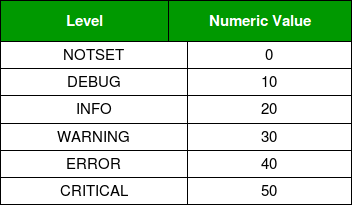

Logging module is packed with several features. It has several constants, classes, and methods. The items with all caps are constant, the capitalize items are classes and the items which start with lowercase letters are methods. 

There are several logger objects offered by the module itself.  

- **Logger.info(msg) :** This will log a message with level INFO on this logger.

- **Logger.warning(msg) :** This will log a message with a level WARNING on this logger.

- **Logger.error(msg) :** This will log a message with level ERROR on this logger.

- **Logger.critical(msg) :** This will log a message with level CRITICAL on this logger.

- **Logger.log(lvl,msg) :** This will Logs a message with integer level lvl on this logger.

- **Logger.exception(msg) :** This will log a message with level ERROR on this logger.

- **Logger.setLevel(lvl) :** This function sets the threshold of this logger to lvl. This means that all the messages below this level will be ignored.

- **Logger.addFilter(filt) :** This adds a specific filter filt into this logger.

- **Logger.removeFilter(filt) :** This removes a specific filter filt into this logger.

- **Logger.filter(record) :** This method applies the logger’s filter to the record provided and returns True if the record is to be processed. Else, it will return False.

- **Logger.addHandler(hdlr) :** This adds a specific handler hdlr to this logger.

- **Logger.removeHandler(hdlr) :** This removes a specific handler hdlr into this logger.

- **Logger.hasHandlers() :** This checks if the logger has any handler configured or not. 

Now, coming back to the previous question of what would have happened had you not setup logging.basicConfig(level=logging.INFO) in the previous example.

The answer is: the log would not have been printed because, the default logger is the ‘root’ and its default basicConfig level is ‘WARNING’. That means, only messages from logging.warning() and higher levels will get logged.

So, the message of logging.info() would not be printed. And that is why the basic config was set as INFO initially (in logging.basicConfig(level=logging.INFO)).

Had I set the level as logging.ERROR instead, only message from logging.error and logging.critical will be logged. Clear?

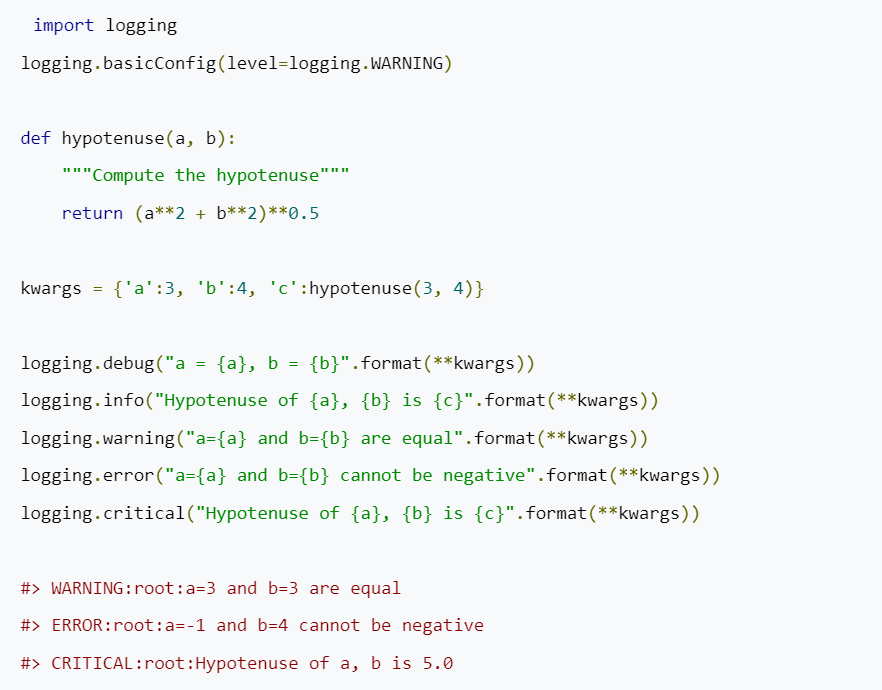

## 1.5 Logging to File Instead of Console

To send the log messages to a file from the root logger, you need to set the file argument in logging.basicConfig().

In [ ]:
import logging
logging.basicConfig(level=logging.INFO, file='sample.log')

Now all subsequent log messages will go straight to the file ‘sample.log’ in your current working directory. If you want to send it to a file in a different directory, give the full file path.

## 1.6 Chaning The Logging Format

The logging module provides shorthands to add various details to the logged messages. The below image from Python docs shows that list.

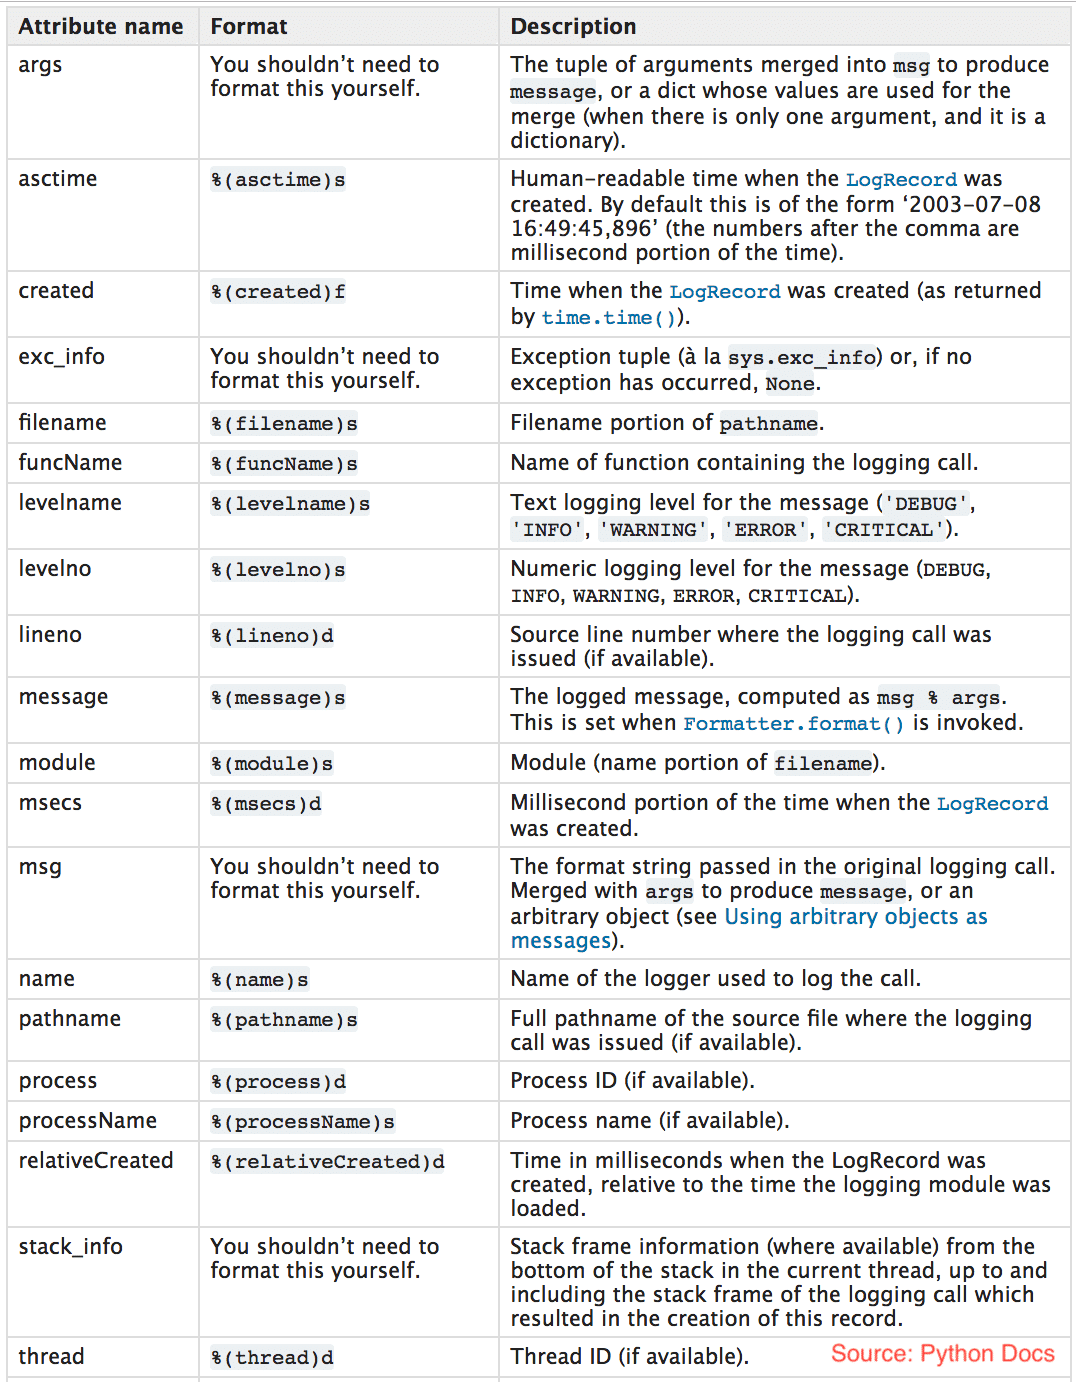

Let’s change the log message format to show the TIME, LEVEL and the MESSAGE. To do that just add the format to logging.basiconfig()‘s format argument.

In [ ]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s :: %(levelname)s :: %(message)s')
logging.info("Just like that!")
#> 2019-02-17 11:40:38,254 :: INFO :: Just like that!

## 1.7 Why Working with the Root Logger for All Modules Isn’t the Best Idea?

Because they all will share the same ‘root’ logger.

But why is that bad?

Let’s look at the below code:

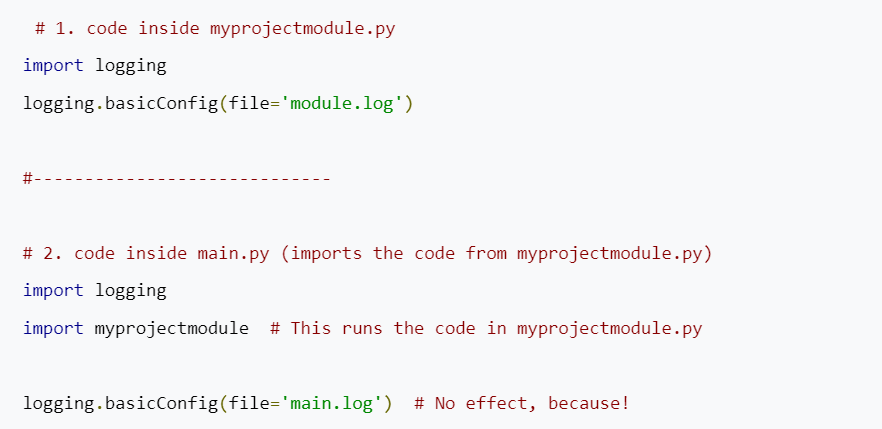

Imagine you have one or more modules in your project. And these modules use the basic root module. Then, when importing the module (‘myprojectmodule.py‘), all of that module’s code will run and logger gets configured.

Once configured, the root logger in the main file (that imported the ‘myprojectmodule‘ module) will no longer be able to change the root logger settings. Because, the logging.basicConfig() once set cannot be changed.

That means, if you want to log the messages from myprojectmodule to one file and the logs from the main module in another file, root logger can’t that.

To do that you need to create a new logger.

## 1.8 How to Create New Logger?

You can create a new logger using the ‘logger.getLogger(name)‘ method. If a logger with the same name exists, then that logger will be used.

While you can give pretty much any name to the logger, the convention is to use the __name__ variable like this:

In [ ]:
logger = logging.getLogger(__name__)
logger.info('my logging message')

But, why use __name__ as the name of the logger, instead of hardcoding a name?

Because the __name__ variable will hold the name of the module (python file) that called the code. So, when used inside a module, it will create a logger bearing the value provided by the module’s __name__ attribute.

By doing this, if you end up changing module name (file name) in future, you don’t have to modify the internal code.

Now, once you’ve created a new logger, you should remember to log all your messages using the new logger.info() instead of the root’s logging.info() method.

Another aspect to note is, all the loggers have a built-in hierarchy to it.

What do I mean by that?

For example, if you have configured the root logger to log messages to a particular file. You also have a custom logger for which you have not configured the file handler to send messages to console or another log file.

In this case, the custom logger will fallback and write to the file set by the root logger itself. Until and unless you configure the log file of your custom logger.

So what is a file handler and how to set one up?

## 1.9 What Is and How to Set Up a File Handler and Formatter?

The FileHandler() and Formatter() classes are used to setup the output file and the format of messages for loggers other than the root logger.
Do you remember how we setup the filename and the format of the message in the root logger (inside logging.basicConfig()) earlier?

We just specified the filename and format parameters in logging.basicConfig() and all subsequent logs went to that file.

However, when you create a separate logger, you need to set them up individually using the logging.FileHandler() and logging.Formatter() objects.

A FileHandler is used to make your custom logger to log in to a different file. Likewise, a Formatter is used to change the format of your logged messages.

In [ ]:
import logging

# Gets or creates a logger
logger = logging.getLogger(__name__)  

# set log level
logger.setLevel(logging.WARNING)

# define file handler and set formatter
file_handler = logging.FileHandler('logfile.log')
formatter    = logging.Formatter('%(asctime)s : %(levelname)s : %(name)s : %(message)s')
file_handler.setFormatter(formatter)

# add file handler to logger
logger.addHandler(file_handler)

# Logs
logger.debug('A debug message')
logger.info('An info message')
logger.warning('Something is not right.')
logger.error('A Major error has happened.')
logger.critical('Fatal error. Cannot continue')

Notice how we set the formatter on the ‘file_handler‘ and not the ‘logger‘ directly.

Assuming the above code is run from the main program, if you look inside the working directory, a file named logfile.log will be created if it doesn’t exist and would contain the below messages.

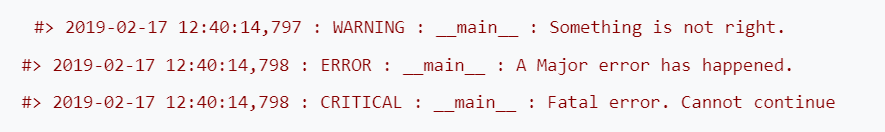

Note again, the Formatter is set on the FileHandler object and not directly on the logger. Something you may want to get used to.

## 1.10 How to Include Traceback Information in Logged Messages?

Besides ‘debug‘, ‘info‘, ‘warning‘, ‘error‘, and ‘critical‘ messages, you can log exceptions that will include any associated traceback information.

With logger.exception, you can log traceback information should the code encounter any error. logger.exception will log the message provided in its arguments as well as the error message traceback info.

Below is a nice example.

In [ ]:
import logging

# Create or get the logger
logger = logging.getLogger(__name__)  

# set log level
logger.setLevel(logging.INFO)

def divide(x, y):
    try:
        out = x / y
    except ZeroDivisionError:
        logger.exception("Division by zero problem")
    else:
        return out

# Logs
logger.error("Divide {x} / {y} = {c}".format(x=10, y=0, c=divide(10,0)))

#> ERROR:__main__:Division by zero problem
#> Traceback (most recent call last):
#>   File "<ipython-input-16-a010a44fdc0a>", line 12, in divide
#>     out = x / y
#> ZeroDivisionError: division by zero
#> ERROR:__main__:None

## Practice

Basics of using the logging module to record the events in a file are very simple. 

For that, simply import the module from the library.  

- Create and configure the logger. It can have several parameters. But importantly, pass the name of the file in which you want to record the events.

- Here the format of the logger can also be set. By default, the file works in append mode but we can change that to write mode if required.

- Also, the level of the logger can be set which acts as the threshold for tracking based on the numeric values assigned to each level. There are several attributes which can be passed as parameters.

- The list of all those parameters is given in Python Library. The user can choose the required attribute according to the requirement. After that, create an object and use the various methods as shown in the example.

In [157]:
# Importing module.
import logging
 
# Create and configure logger.
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
 
# Creating an object.
logger = logging.getLogger()
 
# Setting the threshold of logger to DEBUG.
logger.setLevel(logging.DEBUG)
 
# Test messages.
logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

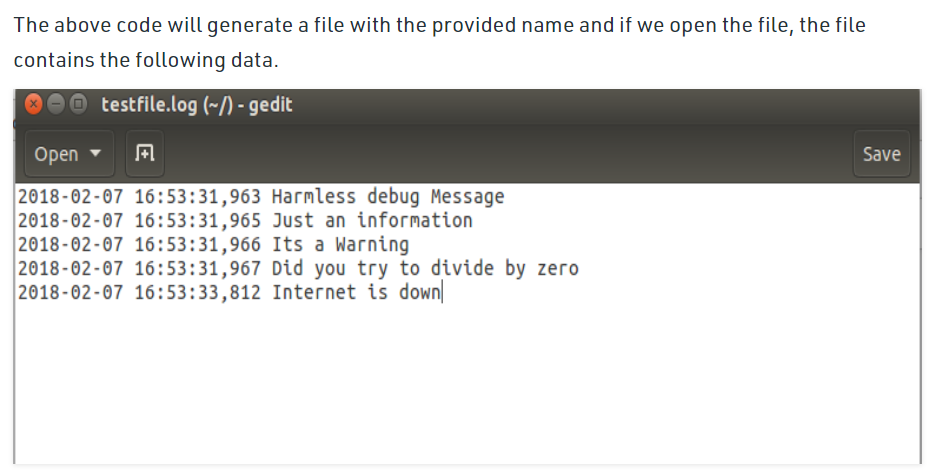

## Practice

- Debug    (Detailed Information About All Processes)
- Info     (Get Some Information And Show It)
- Warning  (Give Warning To User, Some Library Is Deprecated)
- Error    (Unable To Proceed Error)
- Critical (Critical And Needs Immediate Attention)

In [ ]:
import logging 
import os 
os.mkdir("logging")
os.listdir()

['.config', 'logging', 'sample_data']

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/logging/')

In [ ]:
import logging as lg

In [ ]:
lg.basicConfig(filename = "test.log" , level = lg.INFO , format = '%(asctime)s %(message)s')

In [ ]:
lg.info("i am going to start my program")

In [ ]:
os.listdir()

['test.log']

In [ ]:
lg.warning("this is a first warning of my program")

In [ ]:
f = open('test.log','r')
f.read()

'2021-07-29 14:13:33,112 this is a first warning of my program\n2021-07-29 14:13:35,674 this is an error message.\n2021-07-29 14:13:37,202 this is a critical message.\n2021-07-29 14:21:20,233 Error has occured.\n2021-07-29 14:21:20,233 division by zero\nTraceback (most recent call last):\n  File "<ipython-input-19-7371b97e3cb7>", line 3, in test\n    div = a/b\nZeroDivisionError: division by zero\n2021-07-29 14:22:45,030 Error has occured.\n2021-07-29 14:22:45,035 division by zero\nTraceback (most recent call last):\n  File "<ipython-input-22-4a5fefce355f>", line 4, in test\n    div = a/b\nZeroDivisionError: division by zero\n'

In [ ]:
f.close()

In [ ]:
lg.error("this is an error message.")

In [ ]:
lg.critical("this is a critical message.")

In [ ]:
def test(a,b):
  div = a/b
  return div

In [ ]:
test(10,0)

Please check logs for more information.


In [ ]:
def test(a,b):
  try:
    lg.info(str(a)+str(b))
    div = a/b
    return div
  except Exception as e:
    print("Please check logs for more information.")
    lg.error("Error has occured.")
    lg.exception(str(e))

In [ ]:
import logging as lg
lg.basicConfig(filename = "test2.log")
def test(a,b):
  logging.info("This is the start of a function.")
  return a + b

In [ ]:
test(5,15)

20

In [ ]:
os.getcwd()

'/content/logging'

In [ ]:
os.listdir()

['test.log']

In [ ]:
os.chdir('/content/logging/')

In [ ]:
os.listdir()

['test.log']

In [ ]:
logging.shutdown()

## Questions

- Create a logger in your code
- Create one function which can take any number of inputs as an argument and it will be able to return sum of it.
- Capture user input in the log.
- Give user instructions in the log file.
- Read a log file from python and show all the log in console.

In [ ]:
import os
import logging as lg
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'new.log', 'sample_data']

In [ ]:
lg.basicConfig(filename = "new.log", level=lg.INFO)

In [ ]:
def sample(*args):
  lg.info("Start of Function")
  sum = 0
  for i in args:
    lg.info(str(i))
    lg.warning(str(i))
    sum = sum + i
  lg.info("End of Function")
  return sum

In [ ]:
sample(1,100,200,322)

623

In [ ]:
f = open("new.log","r")
print(f.read())

INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:444
INFO:root:5
INFO:root:6
INFO:root:76
INFO:root:7
INFO:root:78
INFO:root:88
INFO:root:8
INFO:root:88
INFO:root:8
INFO:root:8
INFO:root:8
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:444
INFO:root:5
INFO:root:6
INFO:root:76
INFO:root:7
INFO:root:78
INFO:root:88
INFO:root:8
INFO:root:88
INFO:root:8
INFO:root:8
INFO:root:8
INFO:root:Start of Function
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:Start of Function
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:End of Function



# 2. Stream Handler in Python

The StreamHandler call located in the core logging package, sends logging output to stream such as sys.stdout,  sys.stderr, or any file-like object which supports the write() and flush() method.

Return a new instance of StreamHandler class. if the stream is specified, the instance will use it for logging output; otherwise sys.stderr will be used.

**Note : [These](https://www.programcreek.com/python/example/184/logging.StreamHandler) are 30 code examples for showing how to use logging.StreamHandler().**

In [1]:
import logging
import os

In [2]:
logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s %(levelname)s %(message)s')

In [3]:
os.listdir()

['.config', 'test3.log', 'sample_data']

In [4]:
console_log = logging.StreamHandler()
console_log.setLevel(logging.INFO)

In [5]:
format = '%(asctime)s %(levelname)s %(message)s'

In [6]:
console_log.setFormatter(format)

In [7]:
logging.getLogger('').addHandler(console_log)

In [8]:
logging.info("This is my first test code for log.")

%(asctime)s %(levelname)s %(message)s


In [9]:
logger1 = logging.getLogger('logger1.area1')
logger2 = logging.getLogger('logger2.area2')

In [10]:
logger1.info("this is info for logger one")
logger2.debug("this is a debug for logger two")
logger2.info("this is a info for logger two")

%(asctime)s %(levelname)s %(message)s
%(asctime)s %(levelname)s %(message)s


In [11]:
f = open("test3.log","r")
print(f.read())

2021-07-31 06:24:30,502 INFO This is my first test code for log.
2021-07-31 06:27:47,326 INFO this is info for logger one
2021-07-31 06:27:47,329 DEBUG this is a debug for logger two
2021-07-31 06:27:47,329 INFO this is a info for logger two



In [5]:
import logging
import os

logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s - %(name)s - %(levelname)s -  %(message)s', filemode = 'w')
console_log = logging.StreamHandler()
console_log.setLevel(logging.INFO)
format = '%(asctime)s %(name)s %(levelname)s %(message)s'
console_log.setFormatter(format)
logging.getLogger('').addHandler(console_log)
logging.info("This is my first test code for log.")
logger1 = logging.getLogger('user1')
logger2 = logging.getLogger('user2')
a = logging.getLogger('user1')
b = logging.getLogger('user2')

logger1.info("this is info for logger one")
logger2.debug("this is a debug for logger two")
logger2.info("this is a info for logger two")
a.error("this is an error for user 1")
b.critical("this is a critical error for user 2")

%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s


In [6]:
f = open("test3.log","r")
print(f.read())

2021-07-31 07:18:08,289 root INFO This is my first test code for log.
2021-07-31 07:18:08,303 user1 INFO this is info for logger one
2021-07-31 07:18:08,308 user2 DEBUG this is a debug for logger two
2021-07-31 07:18:08,308 user2 INFO this is a info for logger two
2021-07-31 07:18:08,313 matplotlib.pyplot DEBUG Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2021-07-31 07:23:44,925 root INFO This is my first test code for log.
2021-07-31 07:23:44,930 user1 INFO this is info for logger one
2021-07-31 07:23:44,937 user2 DEBUG this is a debug for logger two
2021-07-31 07:23:44,937 user2 INFO this is a info for logger two
2021-07-31 07:23:44,941 user1 ERROR this is an error for user 1
2021-07-31 07:23:44,946 user2 CRITICAL this is a critical error for user 2
2021-07-31 07:33:28,904 root INFO This is my first test code for log.
2021-07-31 07:33:28,918 user1 INFO this is info for logger one
2021-07-31 07:33:28,931 user2 DEBUG this is a debug for logger two
2021-07-31 

In [1]:
# Logging using Stream Handler

import logging
import os

logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s - %(name)s - %(levelname)s -  %(message)s')

# Create Handlers
console_log = logging.StreamHandler()
console_log.setLevel(logging.DEBUG)
format = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_log.setFormatter(format)

# Create a Custom Handler
logging.getLogger('').addHandler(console_log)
logging.info("main log")
logger1 = logging.getLogger('user1')
logger2 = logging.getLogger('user2')

logger1.info("this from user1 info")
logger2.debug("this is from user1 debug")
logger2.info("this is from user2 info")

2021-07-31 07:43:41,795 - root - INFO - main log
2021-07-31 07:43:41,806 - user1 - INFO - this from user1 info
2021-07-31 07:43:41,811 - user2 - DEBUG - this is from user1 debug
2021-07-31 07:43:41,816 - user2 - INFO - this is from user2 info
2021-07-31 07:43:41,825 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
f = open("test3.log","r")
print(f.read())

2021-07-31 07:43:41,795 - root - INFO -  main log
2021-07-31 07:43:41,806 - user1 - INFO -  this from user1 info
2021-07-31 07:43:41,811 - user2 - DEBUG -  this is from user1 debug
2021-07-31 07:43:41,816 - user2 - INFO -  this is from user2 info
2021-07-31 07:43:41,825 - matplotlib.pyplot - DEBUG -  Loaded backend module://ipykernel.pylab.backend_inline version unknown.



# 3. Python Debugger 

## 3.1 Python pdb

Debugging in Python is facilitated by pdb module(python debugger) which comes built-in to the Python standard library. It is actually defined as the class Pdb which internally makes use of bdb(basic debugger functions) and cmd(support for line-oriented command interpreters) modules. 

The major advantage of pdb is it runs purely in the command line thereby making it great for debugging code on remote servers when we don’t have the privilege of a GUI-based debugger. 

pdb supports :

- Setting breakpoints
- Stepping through code
- Source code listing
- Viewing stack traces

## 3.2 Starting Python Debugger 

There are several ways to invoke a debugger.

- To **start debugging within the program** just insert import pdb, pdb.set_trace() commands.  Run your script normally and execution will stop where we have introduced a breakpoint. So basically we are hard coding a breakpoint on a line below where we call set_trace().  With python 3.7 and later versions, there is a built-in function called **breakpoint()** which works in the same manner. Refer following example on how to insert set_trace() function.

**Example 1: Addition of two numbers**

**Intentional Error :** As input() returns string the program concatenates those strings instead of adding input numbers

In [ ]:
import pdb
  
  
def addition(a, b):
    answer = a + b
    return answer
  
  
pdb.set_trace()
x = input("Enter first number : ")
y = input("Enter second number : ")
sum = addition(x, y)
print(sum)

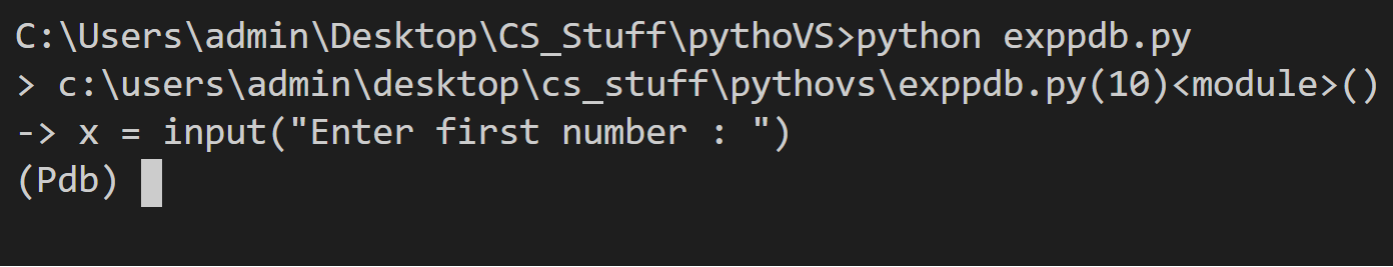

In the output on the first line after the angle bracket, we have the **directory path** of our file, **line number** where our breakpoint is located, and **module**. It’s basically saying that we have a breakpoint in exppdb.py on line number 10 at the module level. If you introduce the breakpoint inside the function then its name will appear inside <>.  The next line is showing the code line where our execution is stopped. That line is not executed yet. 

Then we have the **pdb prompt**. Now to navigate the code we can use the following commands :

**Command and Function :**

- help : To display all commands.
- where : Display the stack trace and line number of the current line.
- next : Execute the current line and move to the next line ignoring function calls.
- step : Step into functions called at the current line.

Now to check the type of variable just write **whatis** and variable name. In the example given below the output of type of x is returned as class string. Thus typecasting string to int in our program will resolve the error.

**Example 2**

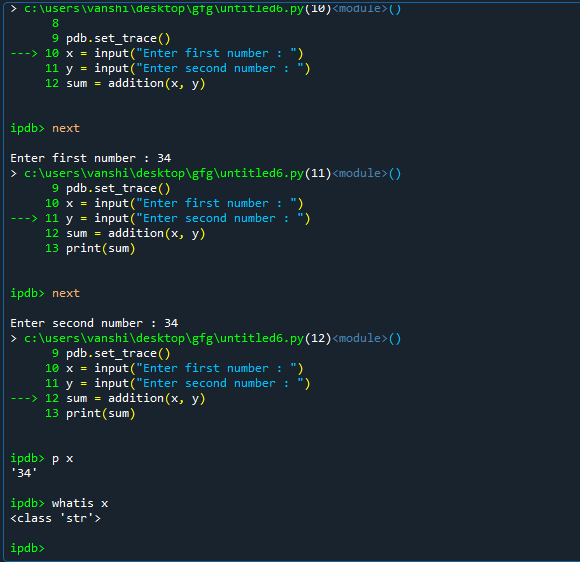

- **From the Command Line :** It is the easiest way of using a debugger. You just have to run the following command in terminal

python -m pdb exppdb.py (put your file name instead of exppdb.py)

This statement loads your source code and stops execution on the first line of code.

**Example 3**

In [ ]:
def addition(a, b):
    answer = a + b
    return answer
  
  
x = input("Enter first number : ")
y = input("Enter second number : ")
sum = addition(x, y)
print(sum)

**Output**

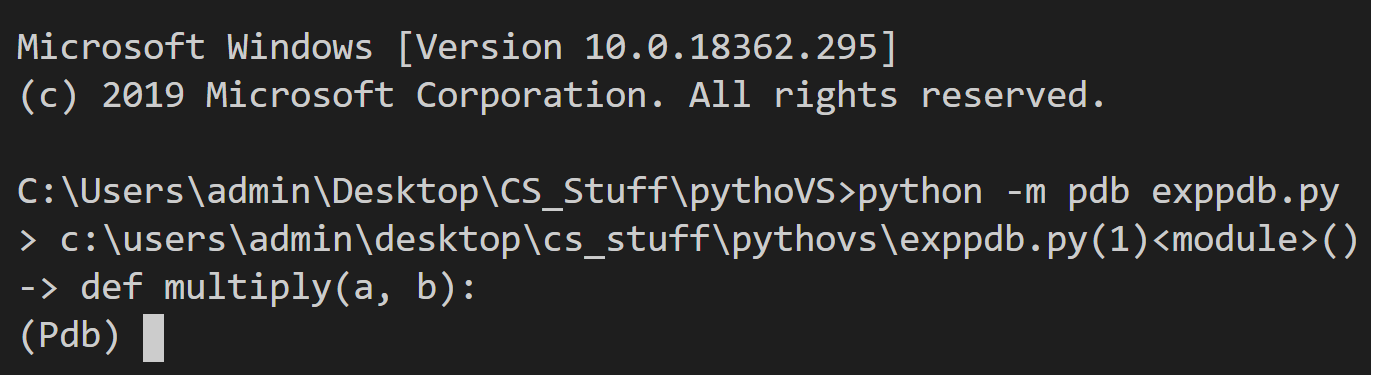

- **Post-mortem debugging** means entering debug mode after the program is finished with the execution process (failure has already occurred).  pdb supports post-mortem debugging through the **pm()** and **post_mortem()** functions. 

- These functions look for active trace back and start the debugger at the line in the call stack where the exception occurred. In the output of the given example you can notice pdb appear when exception is encountered in the program.

**Example 4**

In [ ]:
def multiply(a, b):
    answer = a * b
    return answer
  
  
x = input("Enter first number : ")
y = input("Enter second number : ")
result = multiply(x, y)
print(result)

**Output**

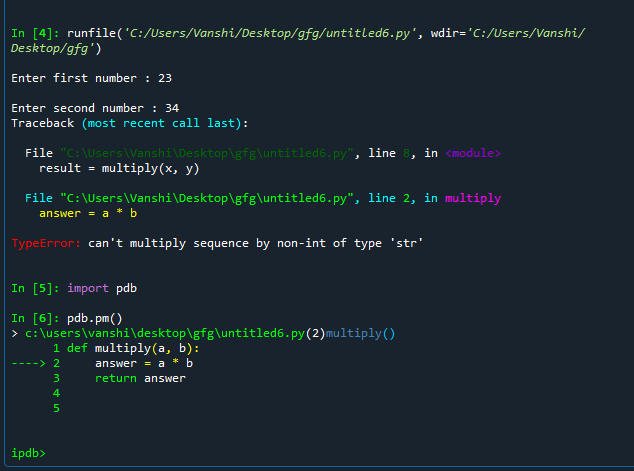

## 3.3 Checking Variables on the Stack

All the variables including variables local to the function being executed in the program as well as global are maintained on the stack. We can use **args( or use a)** to print all the arguments of function which is currently active. 

**p command** evaluates an expression given as an argument and prints the result.

Here, example 4 of  this article is executed in debugging mode to show you how to check for variables :

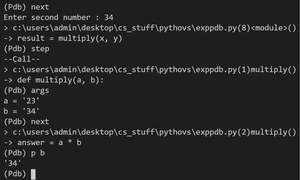

## 3.4 Python pdb Breakpoint 

While working with large programs we often want to add a number of breakpoints where we know errors might occur. To do this you just have to use the break command. When you insert a breakpoint, the debugger assigns a number to it starting from 1.  Use the break to display all the breakpoints in the program. 

**Syntax :**

break filename: lineno, condition

Given below is the implementation to add breakpoints in a program used for example 4.

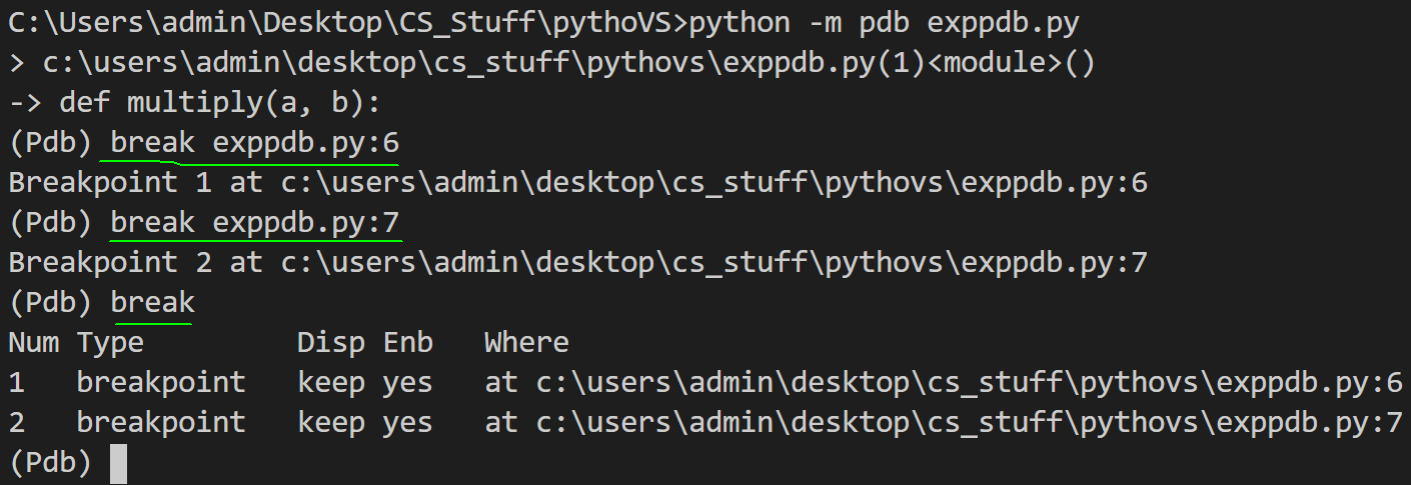

## 3.5 Managing Breakpoints

After adding breakpoints with the help of numbers assigned to them we can manage the breakpoints using the **enable and disable and remove command**. 

**disable** tells the debugger not to stop when that breakpoint is reached while **enable** turns on the disabled breakpoints.

Given below is the implementation to manage breakpoints using Example 4. 

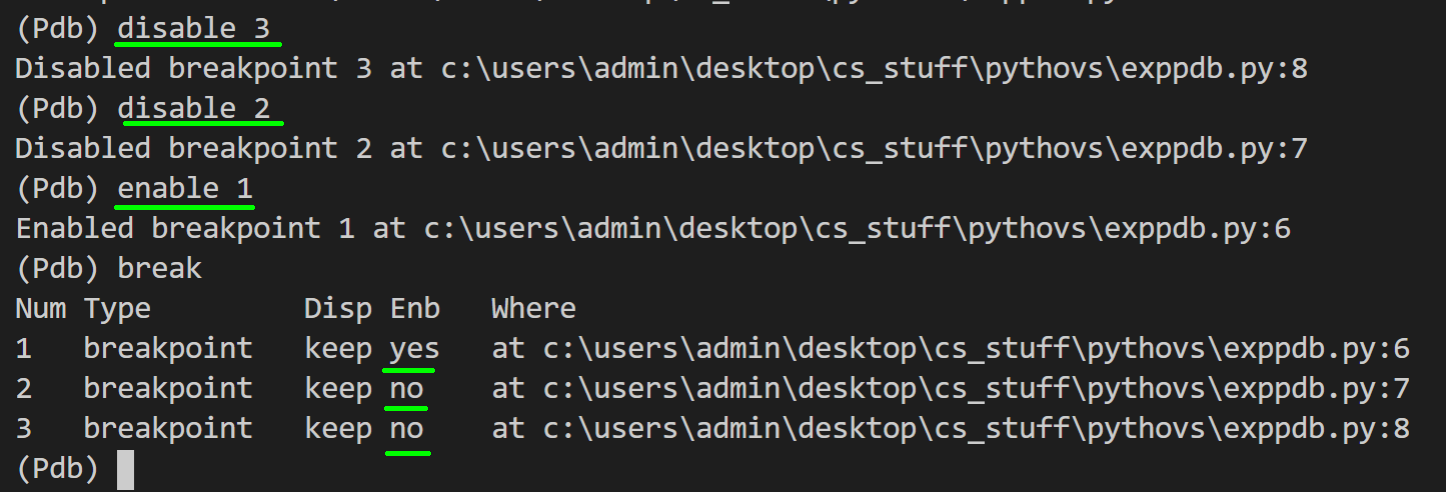

## Practice

In [158]:
import pdb
  
  
def addition(a, b):
    answer = a + b
    return answer
  
  
pdb.set_trace()
x = input("Enter first number : ")
y = input("Enter second number : ")
sum = addition(x, y)
print(sum)

--Return--
None
> <ipython-input-158-3d56995cd368>(9)<module>()
      7 
      8 
----> 9 pdb.set_trace()
     10 x = input("Enter first number : ")
     11 y = input("Enter second number : ")

ipdb> next
    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

> c:\programdata\anaconda3\lib\site-packages\ipython\core\interactiveshell.py(3349)run_ast_nodes()
   3347                     to_run.append((node, 'single'))
   3348 
-> 3349                 for node,mode in to_run:
   3350                     if mode == 'exec':
   3351                         mod = Module([node], [])

ipdb> next
> c:\programdata\anaconda3\lib\site-packages\ipython\core\interactiveshell.py(3350)run_ast_nodes()
   3348 
   3349                 for node,mode in to_run:
-> 3350                     if mode == 'exec':
   3351                         mod = Module([node], [])
   3352                     elif mode == 'single':

ipdb> next
> 

In [2]:
!pip install ipdb

     |████████████████████████████████| 786 kB 13.3 MB/s 
     |████████████████████████████████| 368 kB 63.5 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=da8f83ec695b487bbf638ccab730af75bb5d72a442c6bea642765bdb18ae9623
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit

In [3]:
import ipdb

In [4]:
def testdebug():
  ipdb.set_trace()
  l = []
  for i in range(10):
    l.append(i)
    print("we have appended your data in our list.")
  return l

In [5]:
testdebug()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 332, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-4-e47590c67bc8>(3)testdebug()
      2   ipdb.set_trace()
----> 3   l = []
      4   for i in range(10):

ipdb> h

Documented commands (type help <topic>):
EOF    commands   enable    ll        pp       s                until 
a      condition  exit      longlist  psource  skip_hidden      up    
alias  cont       h         n         q        skip_predicates  w     
args   context    help      next      quit     source           whatis
b      continue   ignore    p         r        step             where 
break  d          interact  pdef      restart  tbreak         
bt     debug      j         pdoc      return   u              
c      disable    jump      pfile     retval   unalias        
cl     display    l         pinfo     run      undisplay      
clear  down       list      pinfo2    rv       unt            

Miscellaneous help topics:
exec  pdb

ipdb> next
> <ipython-input-4-e47590c67bc8>(4)testdebug()
      3   l = []
----> 4   for i in range(10):
      5     l.


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 343, in set_continue
    sys.settrace(None)



we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [1]:
def testdebug():
  l = []
  for i in range(10):
    for j in range(5):
      l.append(i)
      print("we have appended your data in our list.")
  return l

In [2]:
testdebug()

we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.


[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9]